# Covid spread relation with climate

In this notebook, we'll compare the spread of Covid-19 with the climate and the mean temperature of the countries. 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


data_exp = pd.read_csv('data/data_spread_rate_exp.csv')
data_time = pd.read_csv('data/data_spread_rate_time.csv')
data_repr = pd.read_csv('data/data_spread_rate_reproduction.csv')

data = data_repr

## Spread rate vs. Koeppen-Geiger climate classification

### Raw classification

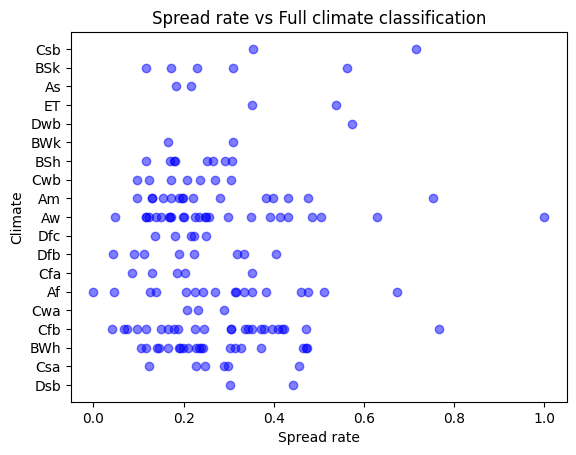

In [7]:
plt.scatter(data['Spread rate'], data['Climate'], color='blue', alpha=0.5)
plt.xlabel('Spread rate')
plt.ylabel('Climate')
plt.title('Spread rate vs Full climate classification')
plt.show()

In [8]:
climate = data['Climate'].astype('category').cat.codes
spread_rate = data['Spread rate']
correlation = climate.corr(spread_rate)
print(f'Correlation between spread rate and climate: {correlation}')

Correlation between spread rate and climate: -0.01837713269272453


Plotting the spread rate of Covid-19 vs. the Koeppen-Geiger climate classification of the countries gives a very weak correlation.

To try and improve the correlation, we can group the countries by the different aspects of the climate classification : main climate, precipitation and temperature.

### Grouping by sub-classification

In the Koeppen-Geiger climate classification, the climate is divided into five main groups represented by the letters A, B, C, D, and E for the equatorial, arid, warm temperate, snow, and polar climates, respectively.

The precipitation can be added as a second letter: W for desert, S for steppe, f for fully humid, s for summer dry, and w for winter dry and m for monsoonal.

The temperature can be added as a third letter: h for hot arid, k for cold arid, a for hot summer, b for warm summer, c for cool summer, d for extremely continental, F for polar frost and T for polar tundra.

In [9]:
data_main_climate = data[['Climate', 'Spread rate']].copy()
data_main_climate['Climate'] = data_main_climate['Climate'].apply(lambda x: x[0])

data_precipitation = data[['Climate', 'Spread rate']].copy()
data_precipitation['Climate'] = data_precipitation['Climate'].apply(lambda x: x[1] if x[1] not in 'FT' else 'None')
data_precipitation = data_precipitation[data_precipitation['Climate'] != 'None']

data_temperature = data[['Climate', 'Spread rate']].copy()
data_temperature['Climate'] = data_temperature['Climate'].apply(lambda x: x[-1] if x[-1] not in 'fmsw' else 'None')
data_temperature = data_temperature[data_temperature['Climate'] != 'None']

#### Main climate

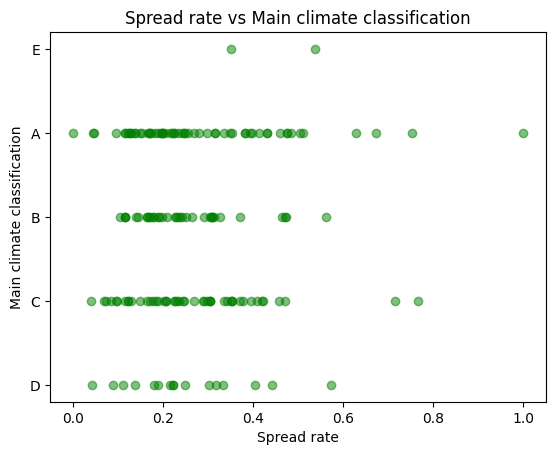

In [10]:
plt.scatter(data_main_climate['Spread rate'], data_main_climate['Climate'], color='green', alpha=0.5)
plt.xlabel('Spread rate')
plt.ylabel('Main climate classification')
plt.title('Spread rate vs Main climate classification')
plt.show()

In [11]:
correlation = data_main_climate['Climate'].astype('category').cat.codes.corr(data_main_climate['Spread rate'])
print(f'Correlation between spread rate and main climate classification: {correlation}')

Correlation between spread rate and main climate classification: -0.02577398072906854


#### Precipitation

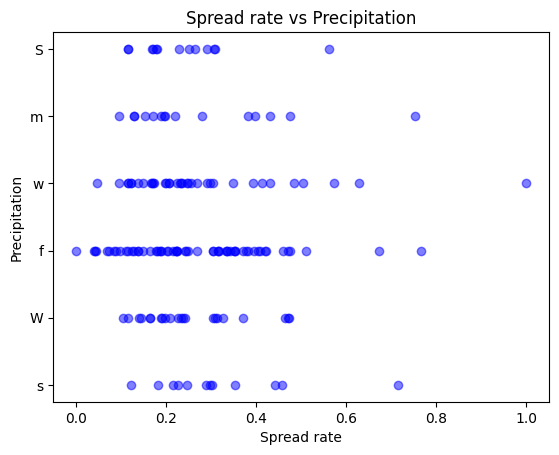

In [12]:
plt.scatter(data_precipitation['Spread rate'], data_precipitation['Climate'], color='blue', alpha=0.5)
plt.xlabel('Spread rate')
plt.ylabel('Precipitation')
plt.title('Spread rate vs Precipitation')
plt.show()

In [13]:
correlation = data_precipitation['Climate'].astype('category').cat.codes.corr(data_precipitation['Spread rate'])
print(f'Correlation between spread rate and precipitation: {correlation}')

Correlation between spread rate and precipitation: 0.08655448429035754
